In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dynamic_margin_requirements.csv', parse_dates=['Date'])

In [19]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First few rows of the dataset:
        Date  Stock_Index_Return  Interest_Rate  Volatility_Index  \
0 2000-01-01           -0.007528       0.017405         20.468227   
1 2000-01-02            0.027043       0.031676         19.879152   
2 2000-01-03            0.013920       0.044918         46.250183   
3 2000-01-04            0.005920       0.039289         19.981848   
4 2000-01-05           -0.020639       0.042262         20.877989   

   Trading_Volume  Credit_Spread  Margin_Requirement  
0    6.759760e+06       0.021440            0.257454  
1    7.987146e+06       0.026109            0.289374  
2    2.579632e+06       0.025203            0.441819  
3    6.286254e+06       0.013078            0.236002  
4    5.760285e+06       0.012985            0.447860  

Missing values in the dataset:
Date                  0
Stock_Index_Return    0
Interest_Rate         0
Volatility_Index      0
Trading_Volume        0
Credit_Spread         0
Margin_Requirement    0
dtype: int64


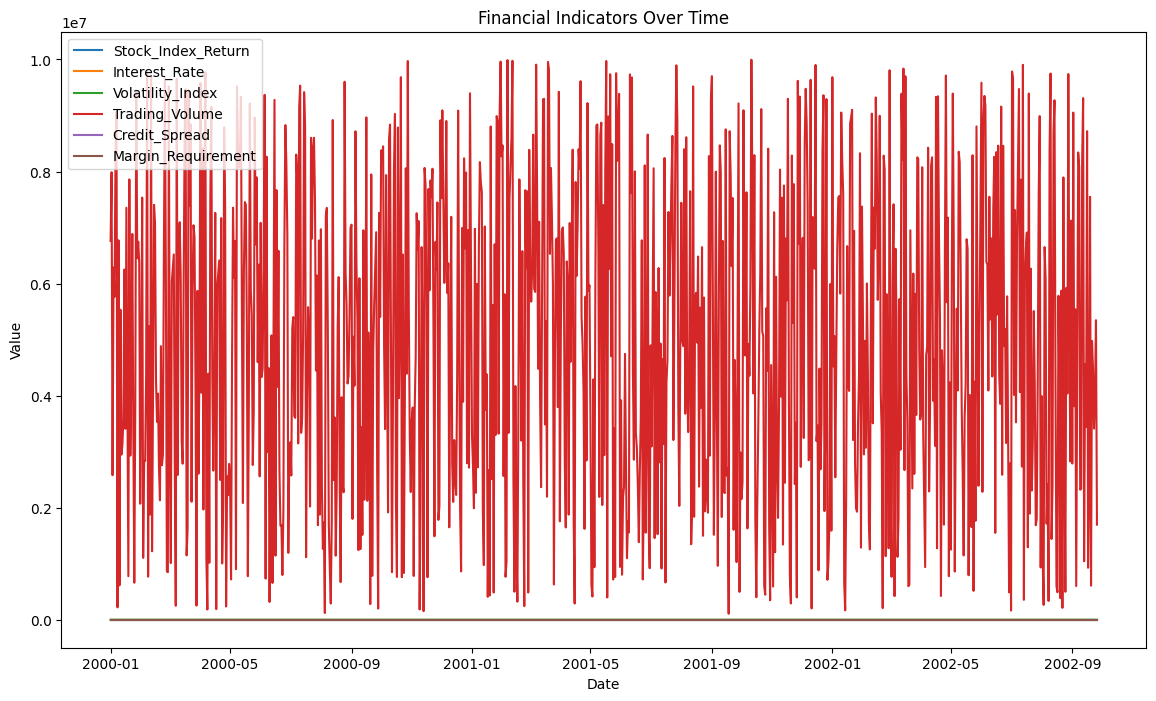

In [20]:
# Plotting the time series of each feature
plt.figure(figsize=(14, 8))
for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], label=column)
plt.title('Financial Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

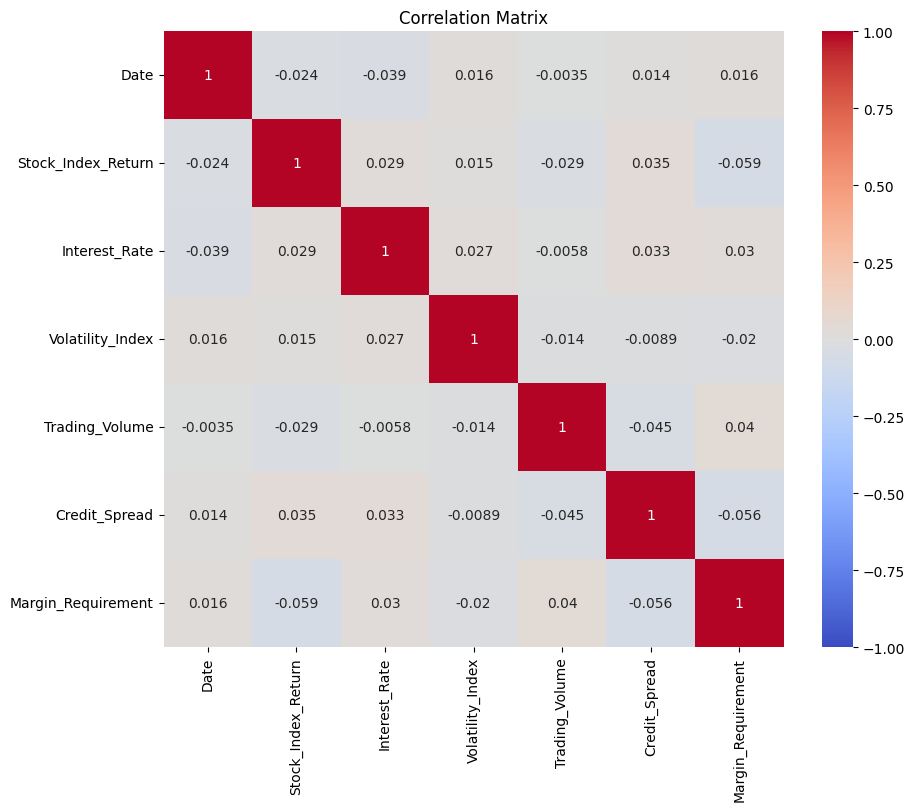

In [21]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


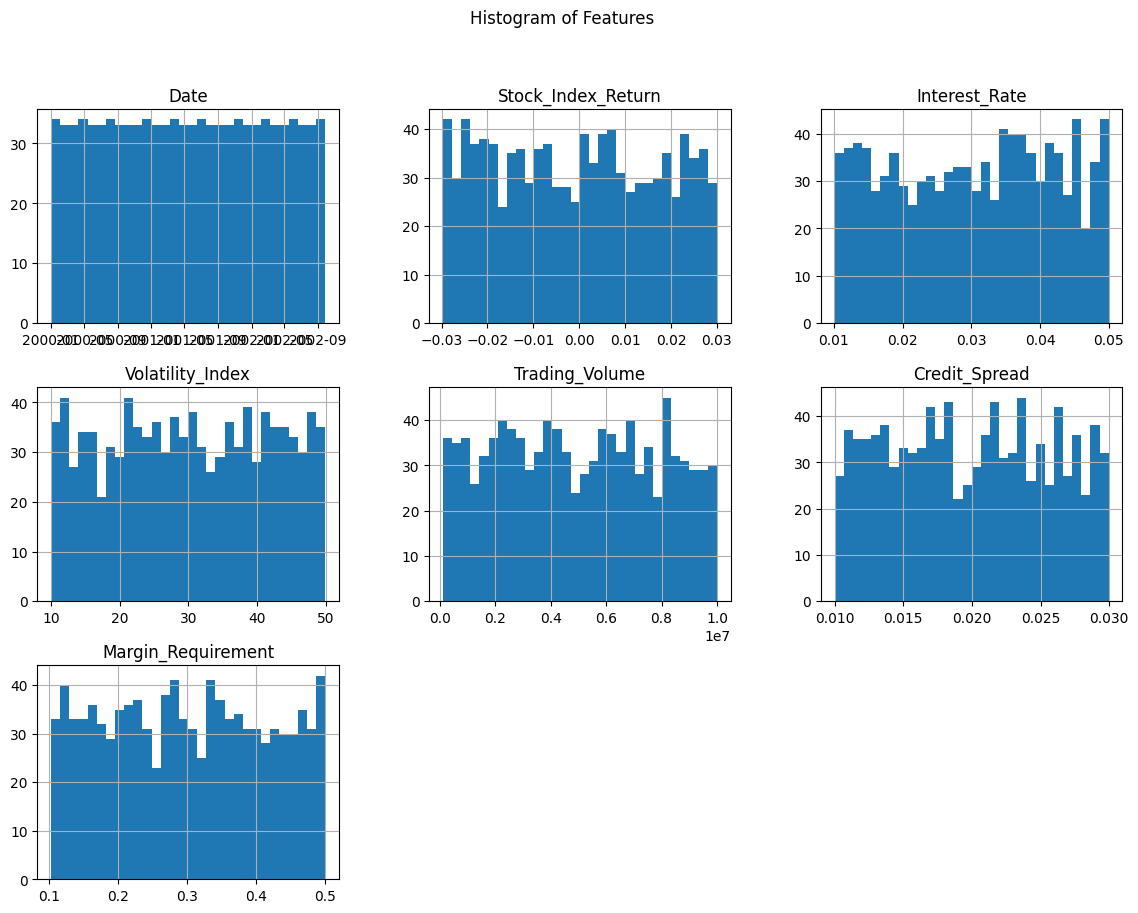

In [22]:
# Plot histograms of each feature
df.hist(bins=30, figsize=(14, 10))
plt.suptitle('Histogram of Features')
plt.show()

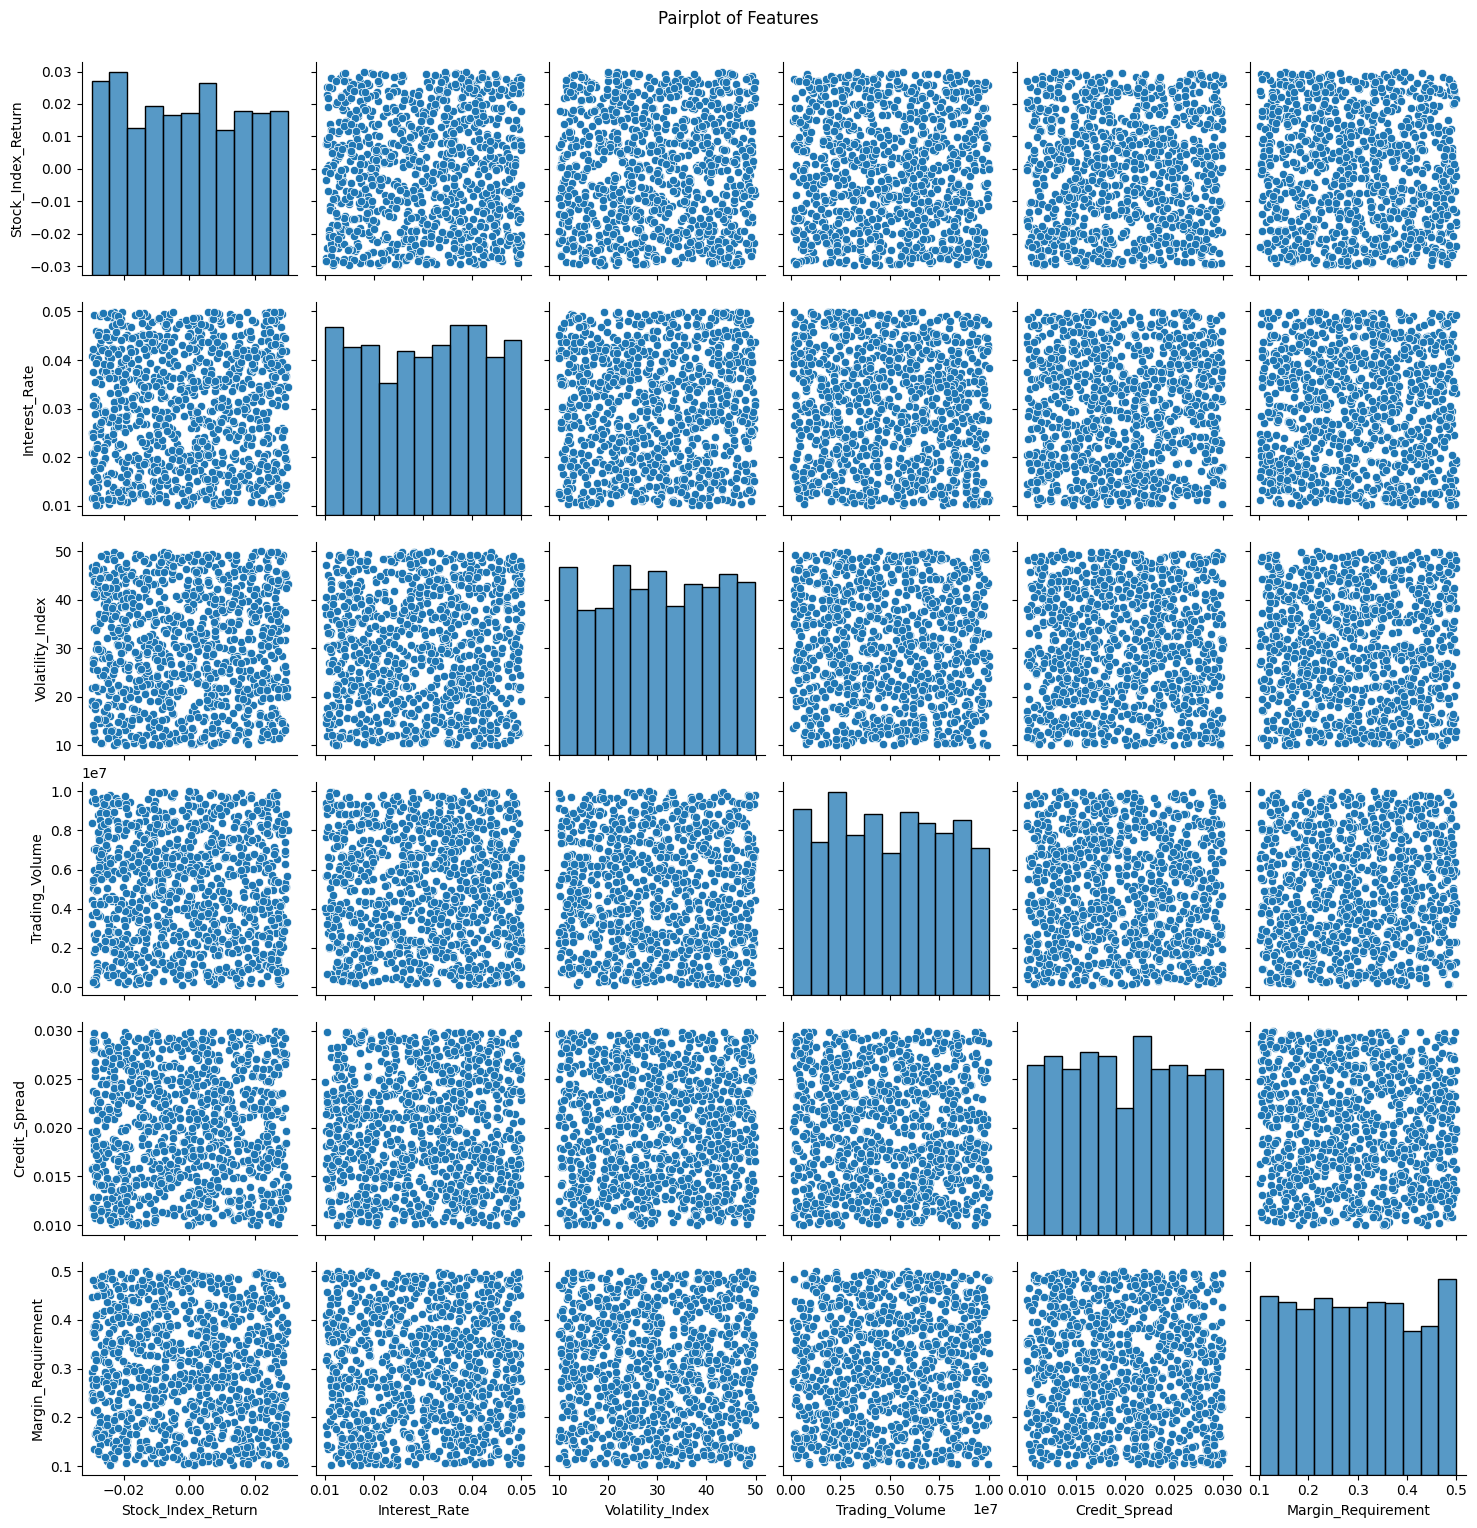

In [23]:
# Plot pairplot to see the relationships between variables
sns.pairplot(df.drop('Date', axis=1))
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(['Date', 'Margin_Requirement'], axis=1)), columns=df.columns[1:-1])
df_scaled['Margin_Requirement'] = df['Margin_Requirement']

# Prepare the data for regression
X = df_scaled.drop('Margin_Requirement', axis=1).values
y = df_scaled['Margin_Requirement'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM and GRU models
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.0648 - mae: 0.2229 - val_loss: 0.0353 - val_mae: 0.1561
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0246 - mae: 0.1285 - val_loss: 0.0154 - val_mae: 0.1028
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0178 - mae: 0.1124 - val_loss: 0.0149 - val_mae: 0.1015
Epoch 4/50
25/25 [=====

In [26]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train.shape[1])),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
gru_model.summary()

# Train the GRU model
history_gru = gru_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 50)                8550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8601 (33.60 KB)
Trainable params: 8601 (33.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 2s 15ms/step - loss: 0.0764 - mae: 0.2408 - val_loss: 0.0241 - val_mae: 0.1254
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0184 - mae: 0.1132 - val_loss: 0.0149 - val_mae: 0.1032
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0165 - mae: 0.1083 - val_loss: 0.0141 - val_mae: 0.0996
Epoch 4/50
25/25 [=======

In [27]:
from tensorflow.keras.layers import Flatten

# Define the DNN model
dnn_model = Sequential([
    Flatten(input_shape=(1, X_train.shape[1])),
    Dense(100, activation='relu'),
    Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
dnn_model.summary()

# Train the DNN model
history_dnn = dnn_model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 5)                 0         
                                                                 
 dense_10 (Dense)            (None, 100)               600       
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.0582 - mae: 0.1955 - val_loss: 0.0263 - val_mae: 0.1352
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.0225 - mae: 0.1241 - val_loss: 0.0193 - val_mae: 0.1137
Epoch 3/50
25/25 [==========